# Boston Housing 회귀분석 실습

이 노트북은 단변량 및 다변량 회귀분석을 통해 `medv`(집값)을 예측하는 과정을 담고 있습니다.
시각화, 가설 수립, 성능 비교까지 포함됩니다.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 데이터 불러오기
file_path = '/content/Boston.csv'
Boston = pd.read_csv(file_path, delimiter=',', na_values=['?'])
Boston = Boston.drop(columns=["Unnamed: 0"])
Boston = Boston.dropna()
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## 1. 상관계수 히트맵

/tmp/ipython-input-4-1158490693.py:5: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1158490693.py:5: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1158490693.py:5: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1158490693.py:5: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1158490693.py:5: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1158490693.py:5: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1158490693.py:5: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight

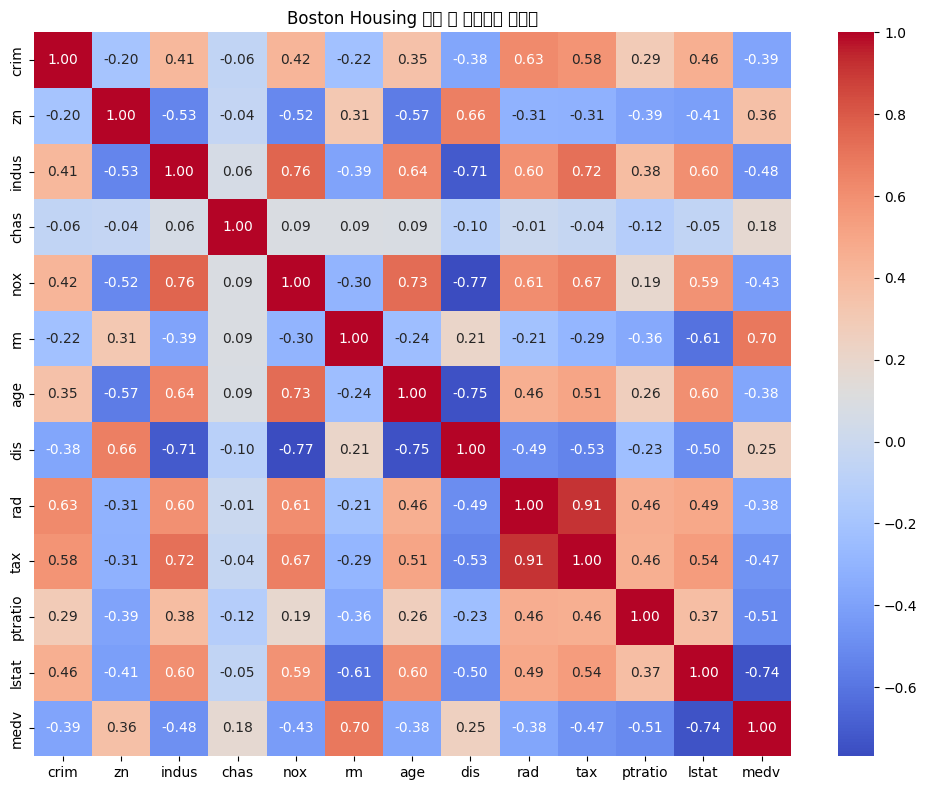

In [4]:
plt.figure(figsize=(10, 8))
correlation_matrix = Boston.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Boston Housing 변수 간 상관계수 히트맵")
plt.tight_layout()
plt.show()

## 2. 주요 변수들의 분포 (히스토그램)

/tmp/ipython-input-5-3825162757.py:4: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-3825162757.py:4: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-3825162757.py:4: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-3825162757.py:4: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-3825162757.py:4: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-3825162757.py:4: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-3825162757.py:4: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_la

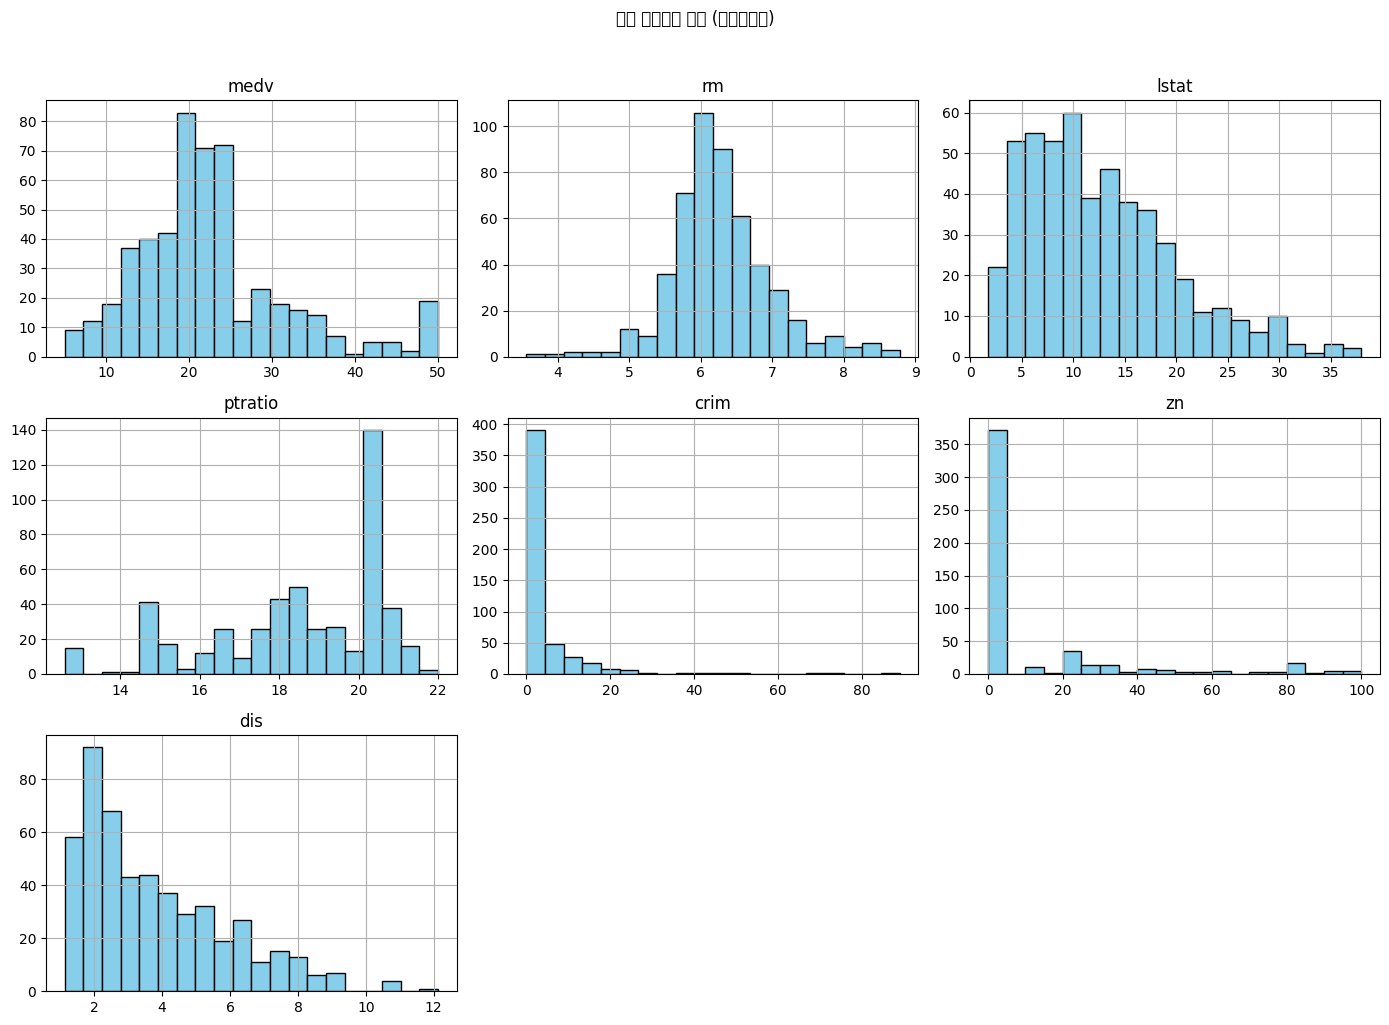

In [5]:
selected_features = ['medv', 'rm', 'lstat', 'ptratio', 'crim', 'zn', 'dis']
Boston[selected_features].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("주요 변수들의 분포 (히스토그램)", y=1.02)
plt.tight_layout()
plt.show()

## 3. 가설 수립 (주석 처리로 명시됨)

In [6]:
# H1: rm(방 개수)이 많을수록 집값(medv)은 증가할 것이다.
# H2: lstat(저소득층 비율)이 높을수록 집값은 하락할 것이다.
# H3: 범죄율(crim)이 높을수록 집값은 낮을 것이다.
# H4: 다변량 모델이 단변량 모델보다 예측력이 높을 것이다.

## 4. 단변량 회귀 모델

In [7]:
model_rm = smf.ols('medv ~ rm', data=Boston).fit()
model_lstat = smf.ols('medv ~ lstat', data=Boston).fit()
model_crim = smf.ols('medv ~ crim', data=Boston).fit()

print(model_rm.summary())
print(model_lstat.summary())
print(model_crim.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.49e-74
Time:                        05:30:55   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

## 5. 다양한 변수 조합 실험

In [8]:
combinations = {
    'rm + lstat': 'medv ~ rm + lstat',
    'rm + ptratio': 'medv ~ rm + ptratio',
    'lstat + dis': 'medv ~ lstat + dis',
    'rm + lstat + ptratio': 'medv ~ rm + lstat + ptratio',
    'rm + lstat + crim': 'medv ~ rm + lstat + crim',
    'rm + lstat + ptratio + dis': 'medv ~ rm + lstat + ptratio + dis'
}

model_results = []
for label, formula in combinations.items():
    model = smf.ols(formula, data=Boston).fit()
    model_results.append({
        'Model': label,
        'R_squared': model.rsquared,
        'Adj_R_squared': model.rsquared_adj,
        'AIC': model.aic
    })

df_models = pd.DataFrame(model_results)
df_models

,Model,R_squared,Adj_R_squared,AIC
0,rm + lstat,0.638562,0.637124,3171.542314
1,rm + ptratio,0.561253,0.559509,3269.620434
2,lstat + dis,0.562228,0.560488,3268.494771
3,rm + lstat + ptratio,0.678624,0.676704,3114.097267
4,rm + lstat + crim,0.645852,0.643736,3163.231628
5,rm + lstat + ptratio + dis,0.690308,0.687835,3097.359045


In [10]:
# 가장 성능이 좋았던 다변량 회귀모델 결과 출력
model_multi = smf.ols('medv ~ rm + lstat + ptratio', data=Boston).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.69e-123
Time:                        05:32:06   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.0

## 6. 잔차 플롯 비교 (단변량 vs 다변량)

/tmp/ipython-input-9-3673309954.py:23: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-3673309954.py:23: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-3673309954.py:23: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-3673309954.py:23: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.

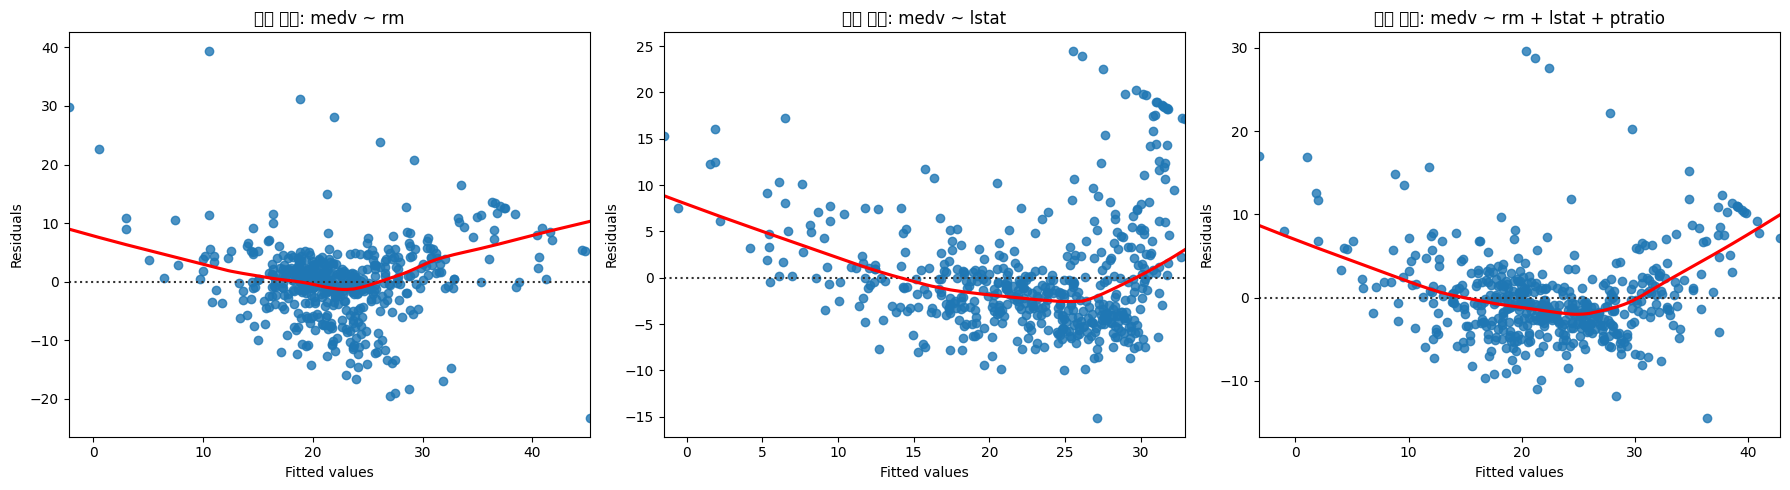

In [9]:
model_multi = smf.ols('medv ~ rm + lstat + ptratio', data=Boston).fit()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.residplot(x=model_rm.fittedvalues, y=model_rm.resid,
              lowess=True, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title("잔차 플롯: medv ~ rm")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")

sns.residplot(x=model_lstat.fittedvalues, y=model_lstat.resid,
              lowess=True, line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_title("잔차 플롯: medv ~ lstat")
axes[1].set_xlabel("Fitted values")
axes[1].set_ylabel("Residuals")

sns.residplot(x=model_multi.fittedvalues, y=model_multi.resid,
              lowess=True, line_kws={'color': 'red'}, ax=axes[2])
axes[2].set_title("잔차 플롯: medv ~ rm + lstat + ptratio")
axes[2].set_xlabel("Fitted values")
axes[2].set_ylabel("Residuals")

plt.tight_layout()
plt.show()